In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_income_consumption_gender.csv', header= None, names= ['Income', 'Consumer', 'Male'])
summary_statistics = df.describe(include='all')
print(summary_statistics)

             Income      Consumer        Male
count  9.610000e+02  9.610000e+02  961.000000
mean   2.575565e+05  2.401659e+05    0.529657
std    1.846497e+05  1.425792e+05    0.499380
min    1.890100e+04  0.000000e+00    0.000000
25%    1.470010e+05  1.488651e+05    0.000000
50%    2.050010e+05  2.262722e+05    1.000000
75%    3.087010e+05  3.085111e+05    1.000000
max    1.641001e+06  1.141876e+06    1.000000


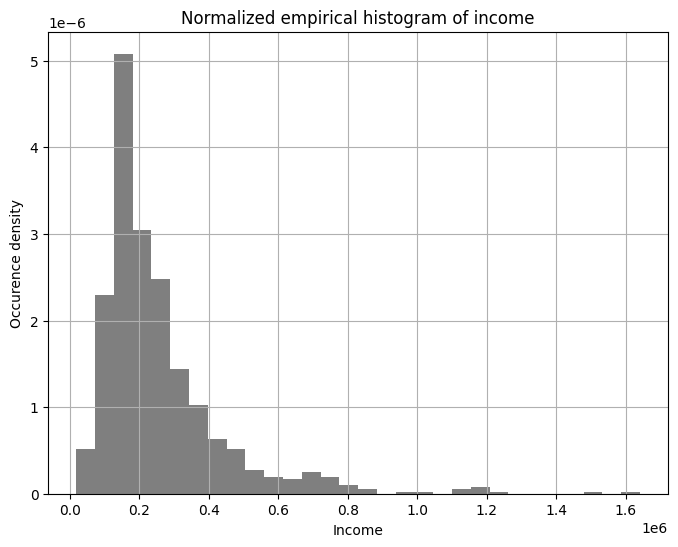

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['Income'], bins=30, density=True, alpha=0.5, color='black')
plt.xlabel('Income')
plt.ylabel('Occurence density')
plt.title('Normalized empirical histogram of income')
plt.grid(True)
plt.show()

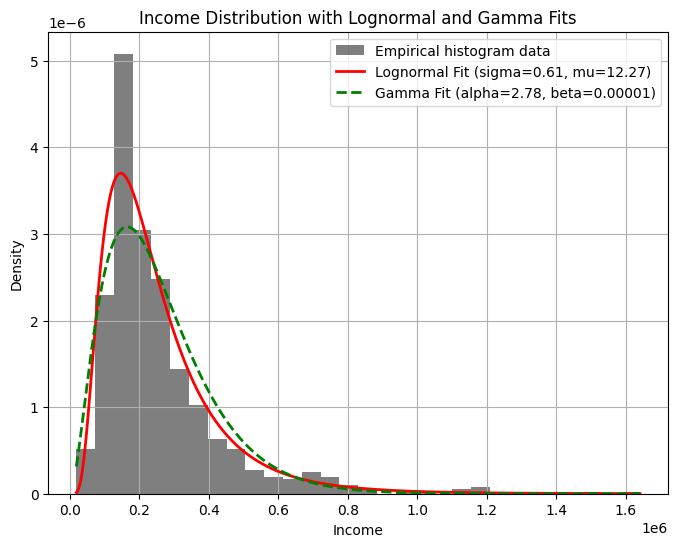

In [ ]:
from scipy.stats import lognorm, gamma
from scipy import stats
import numpy as np
#storing all income values
income = df['Income'].values
#parameters of lornormal dist.
parameters_lognorm = lognorm.fit(income, floc=0)
sigma, loc, scale_lognorm = parameters_lognorm
#parameters of gamma dist.
parameters_gamma = gamma.fit(income, floc=0)
a, loc, scale_gamma = parameters_gamma

x = np.linspace(income.min(), income.max(), 1000)

pdf_lognorm = stats.lognorm.pdf(x, sigma, scale=scale_lognorm)
pdf_gamma = stats.gamma.pdf(x, a, scale=scale_gamma)

plt.figure(figsize=(8, 6))
plt.hist(income, bins=30, density=True, alpha=0.5, color='black', label='Empirical histogram data')
plt.plot(x, pdf_lognorm, 'r-', lw=2, label=f'Lognormal Fit (sigma={sigma:.2f}, mu={np.log(scale_lognorm):.2f})')
plt.plot(x, pdf_gamma, 'g--', lw=2, label=f'Gamma Fit (alpha={a:.2f}, beta={1/scale_gamma:.5f})')
plt.xlabel('Income')
plt.ylabel('Density')
plt.title('Income Distribution with Lognormal and Gamma Fits')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from scipy.stats import lognorm, gamma

# Loading data
data = df['Income'].values

# Log-likelihood for Lognormal
log_likelihood_lognorm = np.sum(lognorm.logpdf(data, sigma, scale=scale_lognorm))

# Log-likelihood for Gamma
log_likelihood_gamma = np.sum(gamma.logpdf(data, a, scale=scale_gamma))

n = len(data)  # Sample size
k = 2          # Both distributions have 2 parameters (shape and scale)

# AIC = 2k - 2*log(L)
aic_lognorm = 2 * k - 2 * log_likelihood_lognorm
aic_gamma = 2 * k - 2 * log_likelihood_gamma

# BIC = k*ln(n) - 2*log(L)
bic_lognorm = k * np.log(n) - 2 * log_likelihood_lognorm
bic_gamma = k * np.log(n) - 2 * log_likelihood_gamma

print(f"Lognormal Fit: AIC = {aic_lognorm:.2f}, BIC = {bic_lognorm:.2f}")
print(f"Gamma Fit:     AIC = {aic_gamma:.2f}, BIC = {bic_gamma:.2f}")

# Lower AIC/BIC indicates better fit
if aic_lognorm < aic_gamma:
    print("\nLognormal has better fit .")
else:
    print("\nGamma has better fit .")

if bic_lognorm < bic_gamma:
    print("Lognormal has better fit .")
else:
    print("Gamma has better fit .")


Lognormal Fit: AIC = 25360.62, BIC = 25370.35
Gamma Fit:     AIC = 25442.35, BIC = 25452.09

Lognormal has better fit .
Lognormal has better fit .


In [ ]:
import statsmodels.api as sm
X = df[['Income', 'Male']]
Y = df['Consumer']

X = sm.add_constant(X)
#modelling OLS regression
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Consumer   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     694.3
Date:                Wed, 14 May 2025   Prob (F-statistic):          4.36e-187
Time:                        15:16:50   Log-Likelihood:                -12337.
No. Observations:                 961   AIC:                         2.468e+04
Df Residuals:                     958   BIC:                         2.470e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.473e+04   5866.294     14.444      0.0